In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Installing Deep Lake

Deep Lake can be installed via `pip`.

In [2]:
from IPython.display import clear_output

!pip3 install deeplake

clear_output()

# Import dataset to deeplake

Manually

This guide creates Deep Lake datasets locally. You may create datasets in the Activeloop cloud by [registering](https://app.activeloop.ai/register), creating an API token, and replacing the local paths below with the path to a dataset in your Deep Lake organization `hub://organization_name/dataset_name`

You don't have to worry about uploading datasets after you've created them. They are automatically synchronized with [wherever they are being stored](https://docs.activeloop.ai/authentication-overview).

In [29]:
import deeplake
from PIL import Image
import numpy as np
import os

ds = deeplake.empty('./CellCancer_ISIC_train') # Creates the dataset

./CellCancer_ISIC_train loaded successfully.


In [30]:
# Find the class_names and list of files that need to be uploaded
dataset_folder = '/content/drive/MyDrive/Kalbe/DeepLake/Skin cancer ISIC/Train'

# Find the subfolders, but filter additional files like DS_Store that are added on Mac machines.
class_names = [item for item in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, item))]

files_list = []
for dirpath, dirnames, filenames in os.walk(dataset_folder):
    for filename in filenames:
        files_list.append(os.path.join(dirpath, filename))

In [28]:
import shutil

# Define the path to the folder you want to delete
folder_path = '/content/CellCancer_ISIC'

# Use shutil.rmtree() to recursively delete the folder and its contents
shutil.rmtree(folder_path)


In [36]:
with ds:
    # Create the tensors with names of your choice.
    ds.create_tensor('train', htype = 'image', sample_compression = 'jpg')
    ds.create_tensor('labels', htype = 'class_label', class_names = class_names)

    # Add arbitrary metadata - Optional
    ds.info.update(description = 'My first Deep Lake dataset')
    ds.train.info.update(camera_type = 'SLR')

In [37]:
with ds:
    # Iterate through the files and append to Deep Lake dataset
    for file in files_list:
        label_text = os.path.basename(os.path.dirname(file))
        label_num = class_names.index(label_text)

        #Append data to the tensors
        ds.append({'train': deeplake.read(file), 'labels': np.uint32(label_num)})

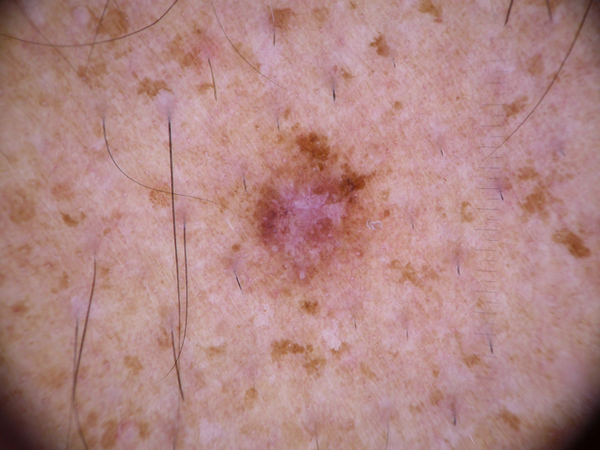

In [38]:
Image.fromarray(ds.train[5].numpy())

In [39]:
ds.summary()

Dataset(path='./CellCancer_ISIC_test', tensors=['train', 'labels'])

 tensor      htype                 shape               dtype  compression
 -------    -------               -------             -------  ------- 
  train      image     (2239, 450:2592, 576:3872, 3)   uint8    jpeg   
 labels   class_label            (2239, 1)            uint32    None   


Testing set

In [56]:
ds_test = deeplake.empty('./CellCancer_ISIC_test') # Creates the dataset

./CellCancer_ISIC_test loaded successfully.


In [57]:
# Find the class_names and list of files that need to be uploaded
dataset_test= '/content/drive/MyDrive/Kalbe/DeepLake/Skin cancer ISIC/Test'

# Find the subfolders, but filter additional files like DS_Store that are added on Mac machines.
class_names = [item for item in os.listdir(dataset_test) if os.path.isdir(os.path.join(dataset_test, item))]

files_list_test = []
for dirpath, dirnames, filenames in os.walk(dataset_test):
    for filename in filenames:
        files_list_test.append(os.path.join(dirpath, filename))

In [58]:
with ds_test:
    # Create the tensors with names of your choice.
    ds_test.create_tensor('test', htype='image', sample_compression='jpg')
    ds_test.create_tensor('labels', htype='class_label', class_names=class_names)

    # Add arbitrary metadata - Optional
    ds_test.info.update(description='My first Deep Lake dataset')
    ds_test.test.info.update(camera_type='SLR')

In [59]:
with ds_test:
    # Iterate through the files and append to Deep Lake dataset
    for file in files_list_test:
        label_text = os.path.basename(os.path.dirname(file))
        label_num = class_names.index(label_text)

        #Append data to the tensors
        ds_test.append({'test': deeplake.read(file), 'labels': np.uint32(label_num)})

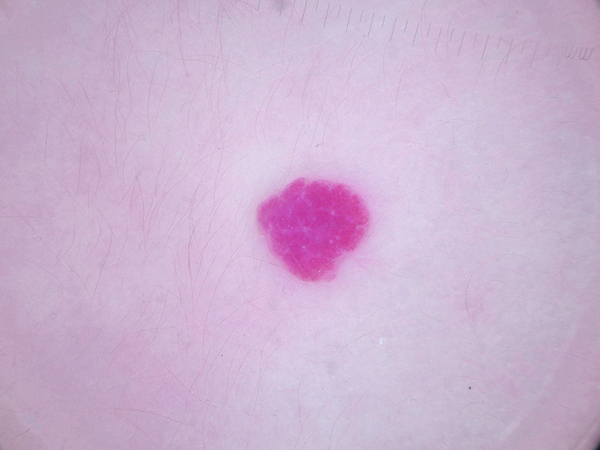

In [61]:
Image.fromarray(ds_test.test[0].numpy())

In [62]:
ds_test.summary()

Dataset(path='./CellCancer_ISIC_test', tensors=['test', 'labels'])

 tensor      htype                shape               dtype  compression
 -------    -------              -------             -------  ------- 
  test       image     (118, 450:4479, 600:6688, 3)   uint8    jpeg   
 labels   class_label            (118, 1)            uint32    None   


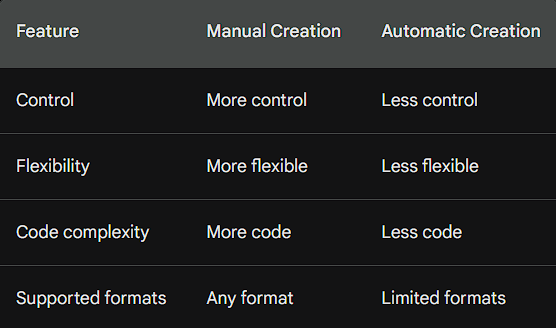

The dataset has the following folder structure:

In [ ]:
import shutil

# Define the path to the folder you want to delete
folder_path = '/content/ISIC_dataset'

# Use shutil.rmtree() to recursively delete the folder and its contents
shutil.rmtree(folder_path)


Automatic Creation

In [65]:
import deeplake
import os

os.environ['ACTIVELOOP_TOKEN'] = "<TOKEN>"


In [39]:
data_directory_train = '/content/drive/MyDrive/Kalbe/DeepLake/Skin cancer ISIC/Train'
deeplake_path_train = 'hub://slvnngrm/skin_cancer_ISIC_train'

ds_train = deeplake.ingest_classification(data_directory_train, deeplake_path_train)

Your Deep Lake dataset has been successfully created!


Synchronizing class labels...



Evaluating class_label_sync: 0%|          | 0/2239 [00:00<?
Evaluating class_label_sync: 100%|██████████| 2239/2239 [00:08<00:00
Evaluating ingest_classification: 100%|██████████| 2239/2239 [15:06<00:00



Ingestion Complete. No files were skipped.




In [40]:
data_directory_test = '/content/drive/MyDrive/Kalbe/DeepLake/Skin cancer ISIC/Test'
deeplake_path_test = 'hub://slvnngrm/skin_cancer_ISIC_test'

ds_test = deeplake.ingest_classification(data_directory_test, deeplake_path_test)

Your Deep Lake dataset has been successfully created!


Synchronizing class labels...



Evaluating class_label_sync: 0%|          | 0/118 [00:00<?
Evaluating class_label_sync: 100%|██████████| 118/118 [00:07<00:00
Evaluating ingest_classification: 100%|██████████| 118/118 [01:55<00:00



Ingestion Complete. No files were skipped.




# Visualizing Datasets

In [9]:
ds = deeplake.load('hub://slvnngrm/malaria_dataset')

/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/slvnngrm/malaria_dataset



-

hub://slvnngrm/malaria_dataset loaded successfully.



In [10]:
ds.summary()

Dataset(path='hub://slvnngrm/malaria_dataset', tensors=['images', 'labels'])

 tensor      htype               shape              dtype  compression
 -------    -------             -------            -------  ------- 
 images      image     (27560, 0:385, 0:394, 0:3)   uint8     png   
 labels   class_label          (27560, 1)          uint32    None   


In [12]:
ds.visualize()

HINT: Please forward the port - 59731 to your local machine, if you are running on the cloud.
 * Serving Flask app 'dataset_visualizer'
 * Debug mode: off


# _Connecting Deep Lake Datasets to ML Frameworks_



In [63]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:

from PIL import Image
import numpy as np
import time
import torch
from torchvision import transforms, models

# Connect to the training and testing datasets
ds_train = deeplake.load('hub://slvnngrm/skin_cancer_ISIC_train')
ds_test = deeplake.load('hub://slvnngrm/skin_cancer_ISIC_test')

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/slvnngrm/skin_cancer_ISIC_train



|

hub://slvnngrm/skin_cancer_ISIC_train loaded successfully.



/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/slvnngrm/skin_cancer_ISIC_test



\

hub://slvnngrm/skin_cancer_ISIC_test loaded successfully.



In [80]:
tform=transforms.Compose([
        transforms.RandomRotation(10),      # rotate +/- 10 degrees
        transforms.RandomHorizontalFlip(),  # reverse 50% of images
        transforms.Resize(100),             # resize shortest side to 100 pixels
        transforms.CenterCrop(100),         # crop longest side to 100 pixels at center
        #transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [85]:
# Since torchvision transforms expect PIL images, we use the 'pil' decode_method for the 'images' tensor. This is much faster than running ToPILImage inside the transform
train_loader = ds_train.pytorch(num_workers = 0, shuffle = True, transform = {'images': tform, 'labels': None}, batch_size = 16, decode_method = {'images': 'pil'})
test_loader = ds_test.pytorch(num_workers = 0, transform = {'images': tform, 'labels': None}, batch_size = 16, decode_method = {'images': 'pil'})

## Model Definition

In [86]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [90]:
# Use a pre-trained ResNet18
model = models.resnet18(pretrained=True)

# Convert model to grayscale
model.conv1 = torch.nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Update the fully connected layer based on the number of classes in the dataset
model.fc = torch.nn.Linear(model.fc.in_features, len(ds_train.labels.info.class_names))

model.to(device)

# Specity the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.1)

## Training Model

In [91]:
def train_one_epoch(model, optimizer, data_loader, device):

    model.train()

    # Zero the performance stats for each epoch
    running_loss = 0.0
    start_time = time.time()
    total = 0
    correct = 0

    for i, data in enumerate(data_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data['images']
        labels = torch.squeeze(data['labels'])

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total

        # Print performance statistics
        running_loss += loss.item()
        if i % 10 == 0:    # print every 10 batches
            batch_time = time.time()
            speed = (i+1)/(batch_time-start_time)
            print('[%5d] loss: %.3f, speed: %.2f, accuracy: %.2f %%' %
                  (i, running_loss, speed, accuracy))

            running_loss = 0.0
            total = 0
            correct = 0


def test_model(model, data_loader):

    model.eval()

    start_time = time.time()
    total = 0
    correct = 0
    with torch.no_grad():
        for i, data in enumerate(data_loader):
            # get the inputs; data is a list of [inputs, labels]
            inputs = data['images']
            labels = torch.squeeze(data['labels'])

            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs.float())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total

        print('Finished Testing')
        print('Testing accuracy: %.1f %%' %(accuracy))

In [97]:
def train_one_epoch(model, optimizer, data_loader, device):

    model.train()

    # Zero the performance stats for each epoch
    running_loss = 0.0
    start_time = time.time()
    total = 0
    correct = 0

    for i, data in enumerate(data_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data['images']
        labels = torch.squeeze(data['labels'])

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total

        # Print performance statistics
        running_loss += loss.item()
        if i % 10 == 0:    # print every 10 batches
            batch_time = time.time()
            speed = (i+1)/(batch_time-start_time)
            print('[%5d] loss: %.3f, speed: %.2f, accuracy: %.2f %%' %
                  (i, running_loss, speed, accuracy))

            running_loss = 0.0
            total = 0
            correct = 0

    return accuracy


def test_model(model, data_loader):

    model.eval()

    start_time = time.time()
    total = 0
    correct = 0
    with torch.no_grad():
        for i, data in enumerate(data_loader):
            # get the inputs; data is a list of [inputs, labels]
            inputs = data['images']
            labels = torch.squeeze(data['labels'])

            inputs = inputs.to(device)
            labels = labels.to(device)

            # forward pass only during testing
            outputs = model(inputs.float())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total

        print('Finished Testing')
        print('Testing accuracy: %.1f %%' %(accuracy))

    return accuracy


num_epochs = 3
total_train_accuracy = 0.0
total_test_accuracy = 0.0

for epoch in range(num_epochs):  # loop over the dataset multiple times
    print("------------------ Training Epoch {} ------------------".format(epoch+1))
    train_accuracy = train_one_epoch(model, optimizer, train_loader, device)
    total_train_accuracy += train_accuracy

    test_accuracy = test_model(model, test_loader)
    total_test_accuracy += test_accuracy

    print('Epoch {} - Training accuracy: {:.1f}%, Testing accuracy: {:.1f}%'.format(epoch+1, train_accuracy, test_accuracy))

average_train_accuracy = total_train_accuracy / num_epochs
average_test_accuracy = total_test_accuracy / num_epochs

print('Average Training accuracy over {} epochs: {:.1f}%'.format(num_epochs, average_train_accuracy))
print('Average Testing accuracy over {} epochs: {:.1f}%'.format(num_epochs, average_test_accuracy))

print('Finished Training')


------------------ Training Epoch 1 ------------------
[    0] loss: 0.365, speed: 0.47, accuracy: 93.75 %
[   10] loss: 4.138, speed: 1.57, accuracy: 86.25 %
[   20] loss: 5.389, speed: 1.50, accuracy: 80.62 %
[   30] loss: 4.543, speed: 1.61, accuracy: 84.38 %
[   40] loss: 4.102, speed: 1.63, accuracy: 84.38 %
[   50] loss: 4.843, speed: 1.68, accuracy: 82.50 %
[   60] loss: 5.129, speed: 1.65, accuracy: 84.38 %
[   70] loss: 3.701, speed: 1.71, accuracy: 87.50 %
[   80] loss: 5.432, speed: 1.66, accuracy: 78.12 %
[   90] loss: 5.351, speed: 1.74, accuracy: 81.88 %
[  100] loss: 5.644, speed: 1.73, accuracy: 79.38 %
[  110] loss: 4.039, speed: 1.72, accuracy: 87.50 %
[  120] loss: 4.402, speed: 1.70, accuracy: 86.25 %
[  130] loss: 5.637, speed: 1.70, accuracy: 79.38 %
Finished Testing
Testing accuracy: 45.8 %
Epoch 1 - Training accuracy: 83.9%, Testing accuracy: 45.8%
------------------ Training Epoch 2 ------------------
[    0] loss: 0.409, speed: 0.50, accuracy: 81.25 %
[   10] 

In [101]:
# Define class names
classes = [
    'actinic keratosis',
    'basal cell carcinoma',
    'dermatofibroma',
    'melanoma',
    'nevus',
    'pigmented benign keratosis',
    'squamous cell carcinoma',
    'vascular lesion',
    'seborrheic keratosis'
]